In [1]:
from sage.graphs.trees import TreeIterator;
from coloring_groups import EdgeColorings;
from coloring_groups import EdgeColoring;

totals = oeis.find_by_id("A000055");

def test_trees (n):
    print("Testing trees of order", n, "(total ", totals[n] , ")");
    found = [];
    total = totals[n];
    
    i = 0;
    ii = 0;
    j = 0;
    percentage = 0;
    for T in TreeIterator(n):
        for kappa in EdgeColorings(T):
            j = j + 1;
            if not kappa.has_symmetric_edge():
                G = kappa.group();
                if G.order() < factorial(n)/2 and (G.order() != 2 * n or not G.is_isomorphic(DihedralGroup(n))):
                    desc = G.structure_description();
                    if not any(G.is_isomorphic(H) for H in found):
                        print(desc, "(", G.order() , ")", G.is_primitive(),  ":");
                        show(kappa.plot())
                        found.append(G)
                    ii = ii + 1;
        i = i + 1;
        if percentage + 5 < i / total * 100:
            percentage = percentage + 5;
            print("[" + str(int(percentage)) + "%]")
    
    print("[100%]")
    print("Thanks to the symmetric edge condition, we only needed to test", ii, "/", j, "colorings")

Testing trees of order 9 (total  47 )
[5%]
[10%]
(C3 x C3 x C3) : S4 ( 648 ) False :


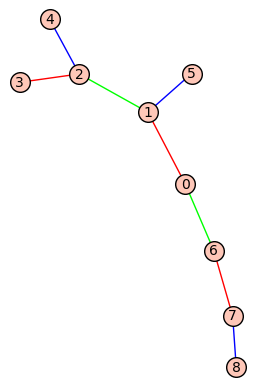

[15%]
[20%]
[25%]
[30%]
[35%]
[40%]
[45%]
[50%]
[55%]
[60%]
[65%]
[70%]
[75%]
[80%]
[85%]
[90%]
[95%]
[100%]
Thanks to the symmetric edge condition, we only needed to test 2 / 9857 colorings
1.9394288063049316


In [4]:
from time import time;
start = time();
test_trees(9)
print(time() - start)